# SVM y Arboles de Decisión


## Librerias

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:


from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report


# from yellowbrick.classifier import ConfusionMatrix
# from yellowbrick.classifier import ClassPredictionError
# from yellowbrick.classifier import ROCAUC
# from yellowbrick.style import set_palette

## Cargar los datos que limpiamos de `exploratory.ipynb`

In [5]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

y_train = df_train["class"].values
X_train = df_train.drop(["class"], axis=1).values

y_test = df_test["class"].values
X_test = df_test.drop(["class"], axis=1).values

# liberar de memoria
del(df_train)
del(df_test)

In [6]:
y_test.shape

(16949,)

## Data Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

del(X_train)

In [ ]:
classes = [0,1,2]
classes_names = ['GALAXY','STAR','QSO']

<a id='7'></a><br>
# Train / Validation Split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size = 0.33, random_state = 42)

In [9]:
print("shapes")
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_val", X_val.shape)
print("y_val", y_val.shape)

print("X_val", X_test.shape)
print("y_val", y_test.shape)

shapes
X_train (81352, 9)
y_train (81352,)
X_val (40070, 9)
y_val (40070,)
X_val (16949, 9)
y_val (16949,)


# Clasificadores

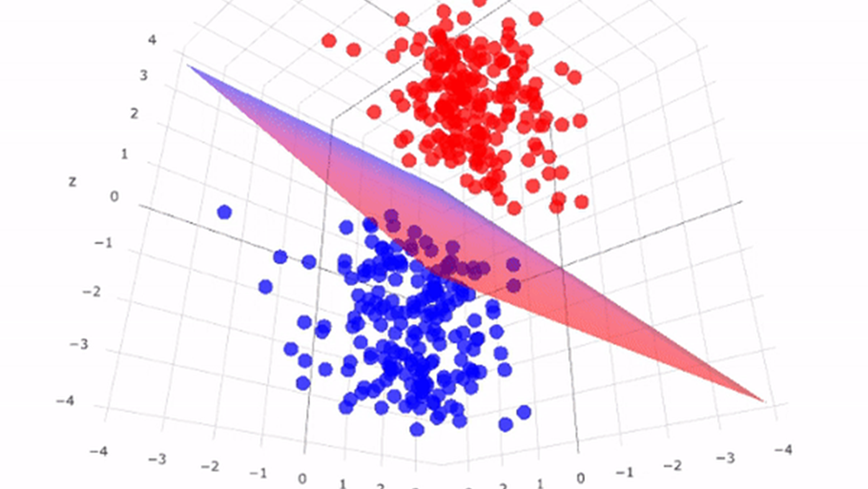

## SVM Classifier 

In [10]:
svm_clf = svm.SVC(kernel='rbf', C=1)
svm_clf.fit(X_train, y_train)


SVC(C=1)

In [11]:
y_pred = svm_clf.predict(X_val)

In [12]:
score = svm_clf.score(X_val, y_val)
svm_score_ = np.mean(score)

print('Accuracy : %.3f' % (svm_score_))

Accuracy : 0.963


<a id='10'></a><br>
### Confusion Matrix

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
# prediccion
y_pred = svm_clf.predict(X_val)

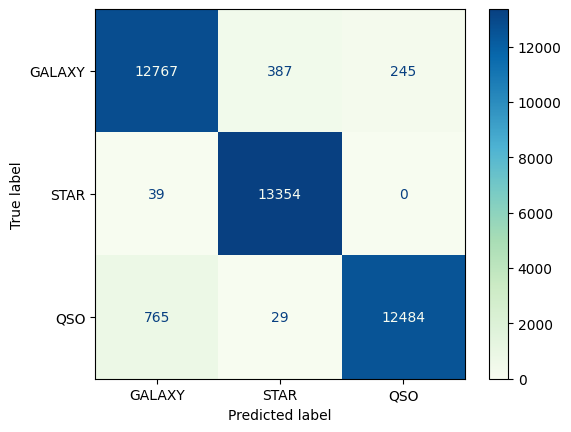

              precision    recall  f1-score   support

      GALAXY       0.94      0.95      0.95     13399
        STAR       0.97      1.00      0.98     13393
         QSO       0.98      0.94      0.96     13278

    accuracy                           0.96     40070
   macro avg       0.96      0.96      0.96     40070
weighted avg       0.96      0.96      0.96     40070



In [26]:
# Matriz de confusion
cm = confusion_matrix(y_val, y_pred, labels=classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes_names)
disp.plot(cmap='GnBu')  # Puedes usar diferentes mapas de colores

plt.show()

# Imprimir el informe de clasificación (similar al classification_report de Yellowbrick)
print(classification_report(y_val, y_pred, target_names=classes_names))


<a id='12'></a><br>
### ROC Curve

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Obtener las predicciones de probabilidad del modelo
y_score = svm_clf.decision_function(X_val)


In [32]:
# Convertir y_val a formato binario (one-vs-rest)
y_val_bin = label_binarize(y_val, classes=[0, 1, 2])
n_classes = y_val_bin.shape[1]

y_val_bin[:5]

array([[0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]])

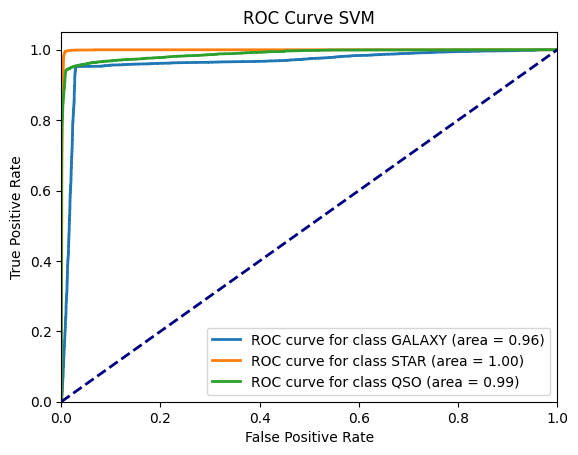

In [83]:
# Graficar la curva ROC para cada clase
plt.figure()

for i in range(n_classes): # iteramos cada clase
    fpr, tpr, _ = roc_curve(y_val_bin[:, i], y_score[:, i]) # dentro de cada clase hacemos una curva ROC
    roc_auc = auc(fpr, tpr) # area under curve
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve for class {classes_names[i]} (area = {roc_auc:.2f})')

# Graficar la diagonal
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve SVM')
plt.legend(loc="lower right")
plt.show()

<a id='13'></a><br>
### Class Prediction Error

Predicted      0      1      2    All
Actual                               
0          12767    387    245  13399
1             39  13354      0  13393
2            765     29  12484  13278
All        13571  13770  12729  40070


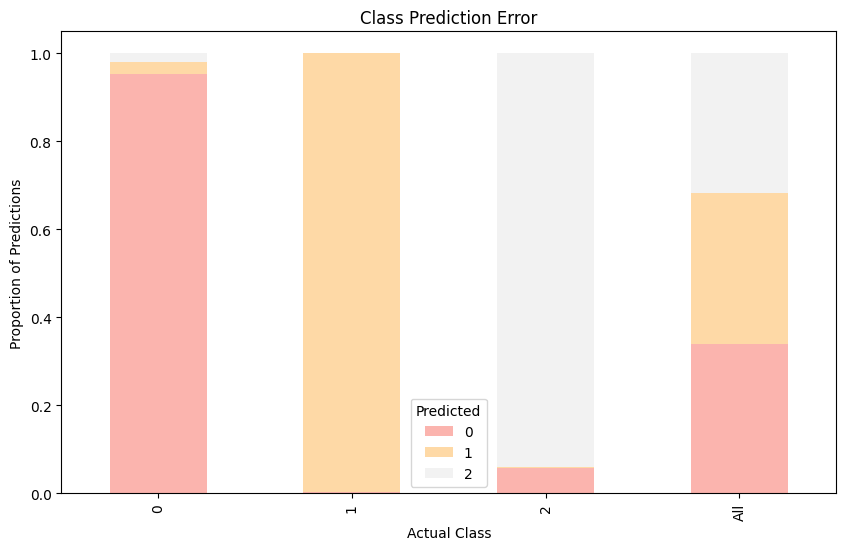

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def class_prediction_error(y_val, y_pred):
	# Crear un DataFrame de predicciones y clases reales
	df = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred})

	# Contar los errores de predicción por clase
	class_errors = pd.crosstab(df['Actual'], df['Predicted'], rownames=['Actual'], colnames=['Predicted'], margins=True)

	# Mostrar la tabla de errores de predicción
	print(class_errors)

	# Visualizar los errores de predicción
	class_errors_normalized = class_errors.div(class_errors['All'], axis=0)
	class_errors_normalized.drop('All', axis=1, inplace=True)

	class_errors_normalized.plot(kind='bar', stacked=True, colormap='Pastel1', figsize=(10,6))
	plt.title('Class Prediction Error')
	plt.ylabel('Proportion of Predictions')
	plt.xlabel('Actual Class')
	plt.show()

class_prediction_error(y_val, y_pred)


# Random Forest Classifier

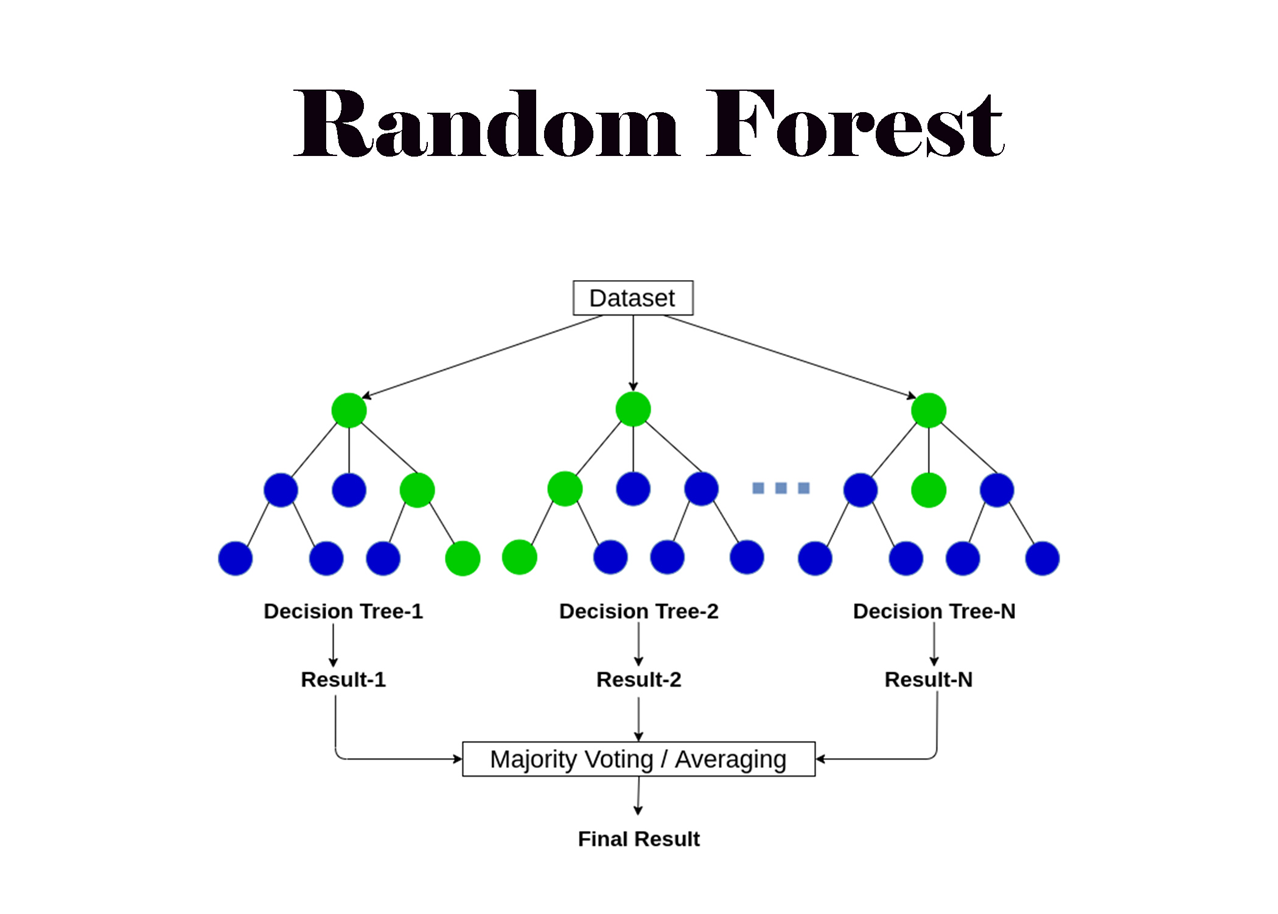

In [35]:
r_forest = RandomForestClassifier()

r_forest.fit(X_train,y_train)

predicted = r_forest.predict(X_val)
score = r_forest.score(X_val, y_val)
rf_score_ = np.mean(score)

print('Accuracy : %.3f' % (rf_score_))

Accuracy : 0.995


In [52]:
r_forest.n_estimators

100

<a id='15'></a><br>
### Confusion Matrix

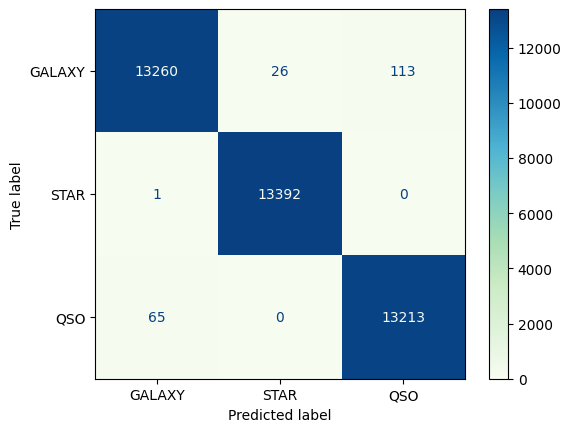

              precision    recall  f1-score   support

      GALAXY       0.94      0.95      0.95     13399
        STAR       0.97      1.00      0.98     13393
         QSO       0.98      0.94      0.96     13278

    accuracy                           0.96     40070
   macro avg       0.96      0.96      0.96     40070
weighted avg       0.96      0.96      0.96     40070



In [37]:
# Matriz de confusion
cm = confusion_matrix(y_val, predicted, labels=classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes_names)
disp.plot(cmap='GnBu')  # Puedes usar diferentes mapas de colores

plt.show()

# Imprimir el informe de clasificación (similar al classification_report de Yellowbrick)
print(classification_report(y_val, y_pred, target_names=classes_names))


### ROC Curve
Aqui utilizo `RocCurveDisplay` de `sklearn` para que vean otras formas de utilizarla,
como se ve nuevamente hay que hacer una binarizacion

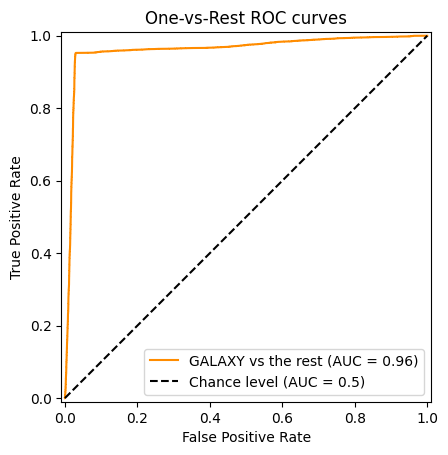

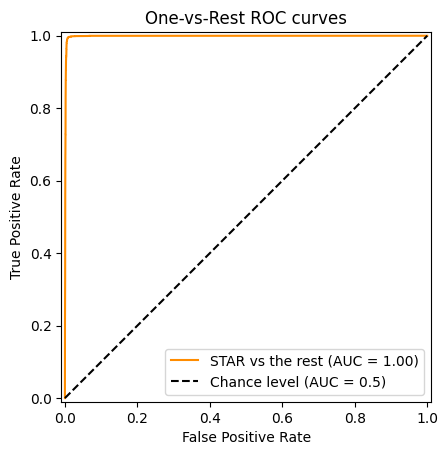

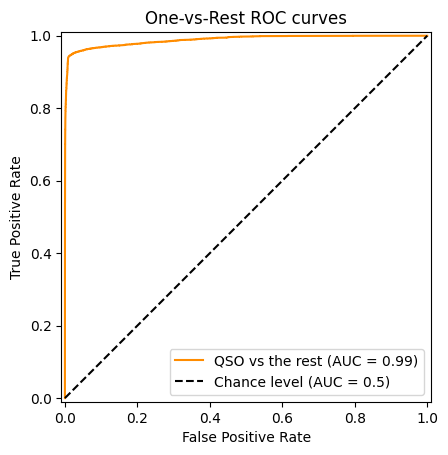

In [45]:
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_val)
y_onehot_test.shape  # (n_samples, n_classes)



for class_id in [0,1,2]:
	display = RocCurveDisplay.from_predictions(
		y_onehot_test[:, class_id],
		y_score[:, class_id],
		name=f"{classes_names[class_id]} vs the rest",
		color="darkorange",
		plot_chance_level=True,
	)
	_ = display.ax_.set(
		xlabel="False Positive Rate",
		ylabel="True Positive Rate",
		title="One-vs-Rest ROC curves",
	)

plt.show()

<a id='18'></a><br>
### Class Prediction Error

Predicted      0      1      2    All
Actual                               
0          13260     26    113  13399
1              1  13392      0  13393
2             65      0  13213  13278
All        13326  13418  13326  40070


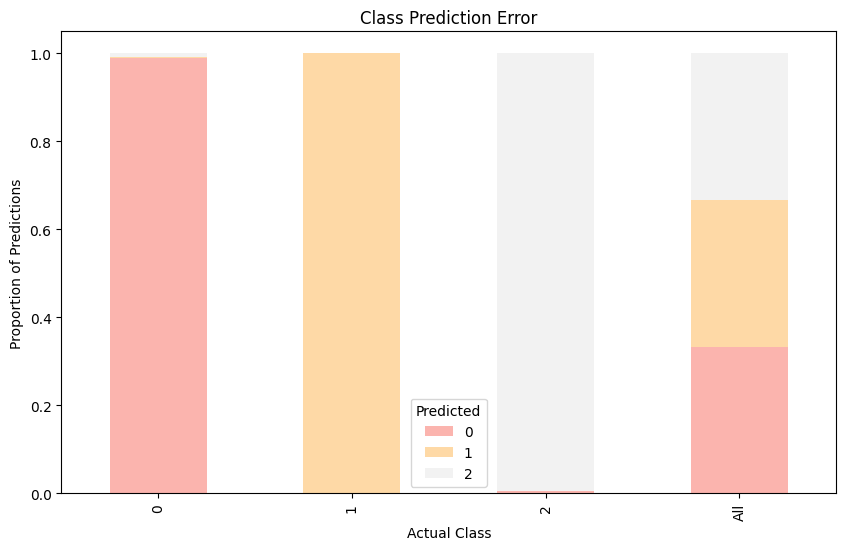

In [51]:
class_prediction_error(y_val, predicted)


# Tecnica Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


In [54]:
AdaBoostClassifier?

Init signature:
AdaBoostClassifier(
    estimator=None,
    *,
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME.R',
    random_state=None,
)
Docstring:     
An AdaBoost classifier.

An AdaBoost [1]_ classifier is a meta-estimator that begins by fitting a
classifier on the original dataset and then fits additional copies of the
classifier on the same dataset but where the weights of incorrectly
classified instances are adjusted such that subsequent classifiers focus
more on difficult cases.

This class implements the algorithm based on [2]_.

Read more in the :ref:`User Guide <adaboost>`.

.. versionadded:: 0.14

Parameters
----------
estimator : object, default=None
    The base estimator from which the boosted ensemble is built.
    Support for sample weighting is required, as well as proper
    ``classes_`` and ``n_classes_`` attributes. If ``None``, then
    the base estimator is :class:`~sklearn.tree.DecisionTreeClassifier`
    initialized with `max_depth=1`.

    .

c:\Users\fbien.DESKTOP-6FMEAR7\Desktop\intro_machine_learning\env\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

      galaxy       0.99      0.99      0.99     13399
        star       1.00      1.00      1.00     13393
         qso       0.99      0.99      0.99     13278

    accuracy                           1.00     40070
   macro avg       1.00      1.00      1.00     40070
weighted avg       1.00      1.00      1.00     40070



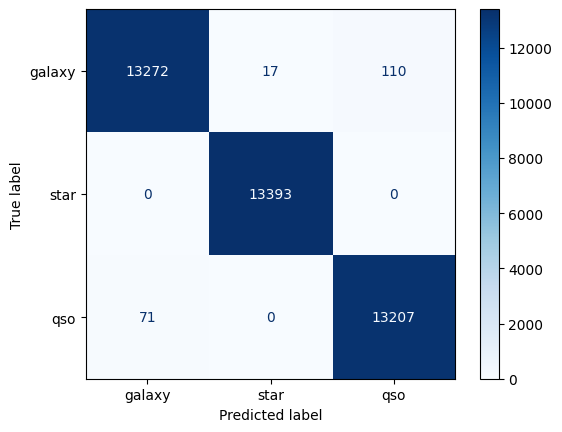

In [56]:
# estimador base clasificador
base_clf = RandomForestClassifier(n_estimators=100)

# Adaboost
boosted_clf = AdaBoostClassifier(estimator=base_clf, n_estimators=50)

# Entrenar el clasificador boosteado
boosted_clf.fit(X_train, y_train)

# Haceer prediccipones
y_pred_boosted = boosted_clf.predict(X_val)

# Evaluar predicciones
print(classification_report(y_val, y_pred_boosted, target_names=["galaxy", "star", "qso"]))

# Mostrar la matrix de confusion
ConfusionMatrixDisplay.from_estimator(boosted_clf, X_val, y_val, display_labels=["galaxy", "star", "qso"], cmap='Blues')
plt.show()


# Comparando todos
En esta parte vamos a utilizar los datos de Testing que nos estuvimos guardando hasta el final, de manera de ser lo más objetivos.
Hasta ahora observamos una mejora con el BoostedRT comparado a RT y SVM, unicamente observando los datos de validación.

Lo que hacemos con testing es simular que hubiera sucedido al soltar el modelo en el mundo, enfrentandose a datos que nunca ha visto.

In [58]:
# no olvidar que X_test no estaba normalizado

X_test_scaled = scaler.transform(X_test)


In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming svm_clf, r_forest, and boosted_clf are your trained models

# SVM predictions
y_pred_svm = svm_clf.predict(X_test_scaled)
# Random Forest predictions
y_pred_rf = r_forest.predict(X_test_scaled)
# Boosted Classifier predictions
y_pred_boosted = boosted_clf.predict(X_test_scaled)

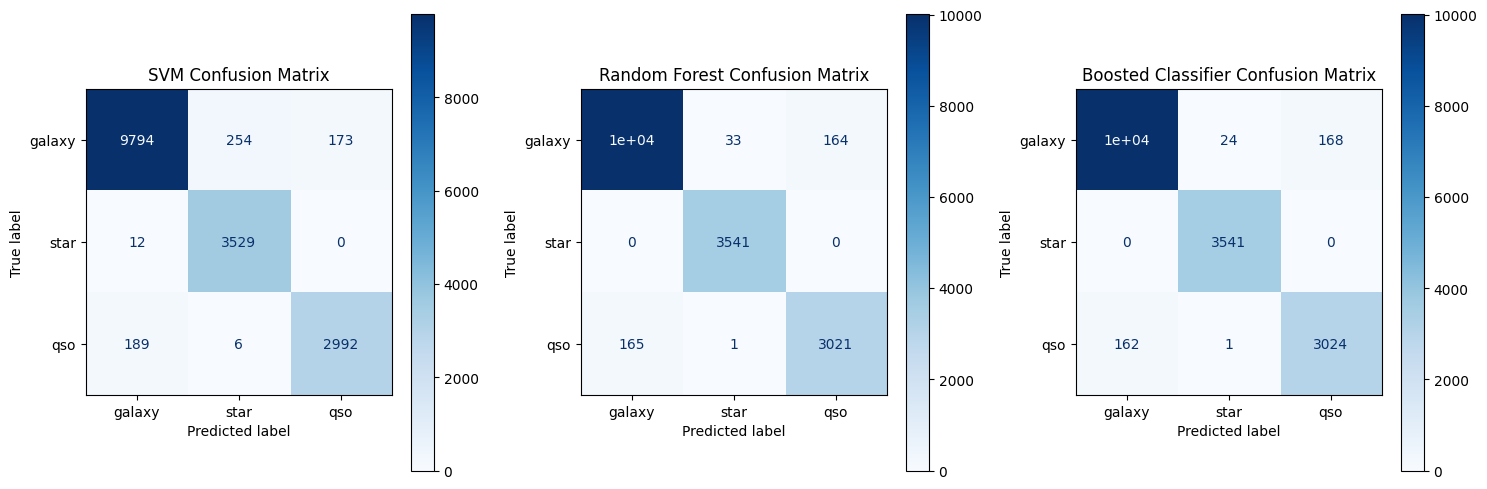

In [60]:
# Plot confusion matrices
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# SVM Confusion Matrix
ConfusionMatrixDisplay.from_estimator(svm_clf, X_test_scaled, y_test, display_labels=["galaxy", "star", "qso"], ax=ax[0], cmap='Blues')
ax[0].set_title('SVM Confusion Matrix')

# Random Forest Confusion Matrix
ConfusionMatrixDisplay.from_estimator(r_forest, X_test_scaled, y_test, display_labels=["galaxy", "star", "qso"], ax=ax[1], cmap='Blues')
ax[1].set_title('Random Forest Confusion Matrix')

# Boosted Classifier Confusion Matrix
ConfusionMatrixDisplay.from_estimator(boosted_clf, X_test_scaled, y_test, display_labels=["galaxy", "star", "qso"], ax=ax[2], cmap='Blues')
ax[2].set_title('Boosted Classifier Confusion Matrix')

plt.tight_layout()
plt.show()


Curvas de ROC

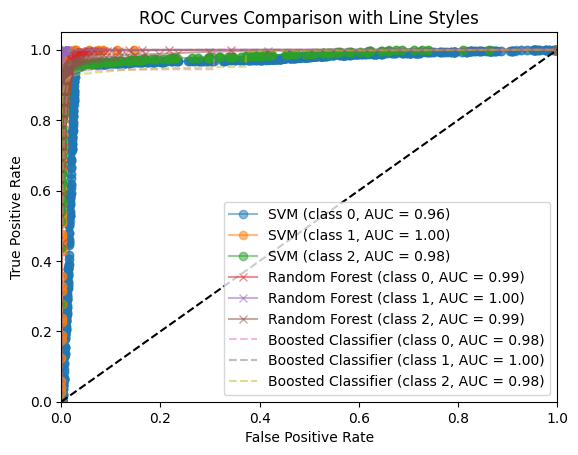

In [76]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curve for a model with custom line style
def plot_roc_curve(model, X_test, y_test_bin, label, linestyle):
    # Get decision function or predicted probabilities
    y_score = model.decision_function(X_test) if hasattr(model, "decision_function") else model.predict_proba(X_test)
    
    # Plot ROC curve for each class
    for i in range(3):  # Assuming there are 3 classes
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, linestyle, label=f'{label} (class {i}, AUC = {roc_auc:.2f})', alpha=0.5)

# Plot ROC curves for each model with different line styles
plot_roc_curve(svm_clf, X_test_scaled, y_test_bin, 'SVM', linestyle='-o')            # Solid line with dots
plot_roc_curve(r_forest, X_test_scaled, y_test_bin, 'Random Forest', linestyle='-x')  # Solid line with crosses
plot_roc_curve(boosted_clf, X_test_scaled, y_test_bin, 'Boosted Classifier', linestyle='--')  # Dotted line

# La diagonal en la curva de ROC representa un modelo aleatorio, que decide lanzando una moneda
# podemos pensar en la curva de ROC como una fomra de comparar nuestro modelo con algo aleatorio
plt.plot([0, 1], [0, 1], 'k--')

# Labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison with Line Styles')
plt.legend(loc="lower right")
plt.show()


Metricas

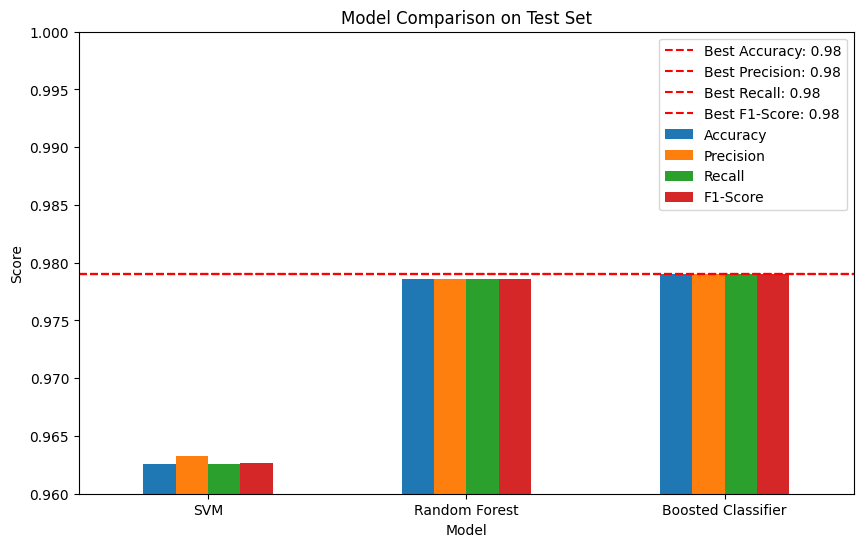

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Get scores for each model
models = ['SVM', 'Random Forest', 'Boosted Classifier']
accuracy = [accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_boosted)]
precision = [precision_score(y_test, y_pred_svm, average='weighted'), 
             precision_score(y_test, y_pred_rf, average='weighted'), 
             precision_score(y_test, y_pred_boosted, average='weighted')]
recall = [recall_score(y_test, y_pred_svm, average='weighted'), 
          recall_score(y_test, y_pred_rf, average='weighted'), 
          recall_score(y_test, y_pred_boosted, average='weighted')]
f1 = [f1_score(y_test, y_pred_svm, average='weighted'), 
      f1_score(y_test, y_pred_rf, average='weighted'), 
      f1_score(y_test, y_pred_boosted, average='weighted')]

# Create a DataFrame for plotting
df_metrics = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})



# Plot the bar chart
ax = df_metrics.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison on Test Set')
plt.ylabel('Score')
plt.ylim(0.96, 1)
plt.xticks(rotation=0)

# Add horizontal lines for the best score in each metric
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    best_score = df_metrics[metric].max()
    ax.axhline(y=best_score, color='r', linestyle='--', label=f'Best {metric}: {best_score:.2f}')

plt.legend()
plt.show()
